In [1]:
# Manejo de datos y graficación 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [2]:
#graficar
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

In [6]:
archivo_csv = r"C:\Users\Nicolas\Desktop\Proyecto Analitica Compu\datos proyect.csv"
df = pd.read_csv(archivo_csv)

# Verifica que los datos se hayan cargado correctamente
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8465 non-null   int64  
 1   RentedBikeCount            8465 non-null   int64  
 2   Hour                       8465 non-null   int64  
 3   Temperature(C)             8465 non-null   float64
 4   Humidity(%)                8465 non-null   int64  
 5   Windspeed(m/s)             8465 non-null   float64
 6   Visibility(10m)            8465 non-null   int64  
 7   Dewpointtemperature(C)     8465 non-null   float64
 8   SolarRadiation(MJ/m2)      8465 non-null   float64
 9   Rainfall(mm)               8465 non-null   float64
 10  Snowfall(cm)               8465 non-null   float64
 11  Seasons                    8465 non-null   int64  
 12  Holiday                    8465 non-null   int64  
 13  Costos                     8465 non-null   float

Coeficientes estimados por Lasso:
Temperature(C)            218.698003
Hour                      195.298020
Dewpointtemperature(C)    165.834524
Snowfall(cm)               14.562992
Windspeed(m/s)             14.430375
Visibility(10m)             8.137569
Holiday                   -26.400369
Rainfall(mm)              -68.953327
SolarRadiation(MJ/m2)     -69.401898
Seasons                  -109.396776
Humidity(%)              -233.682219
dtype: float64
Error cuadrático medio: 174795.84282918484


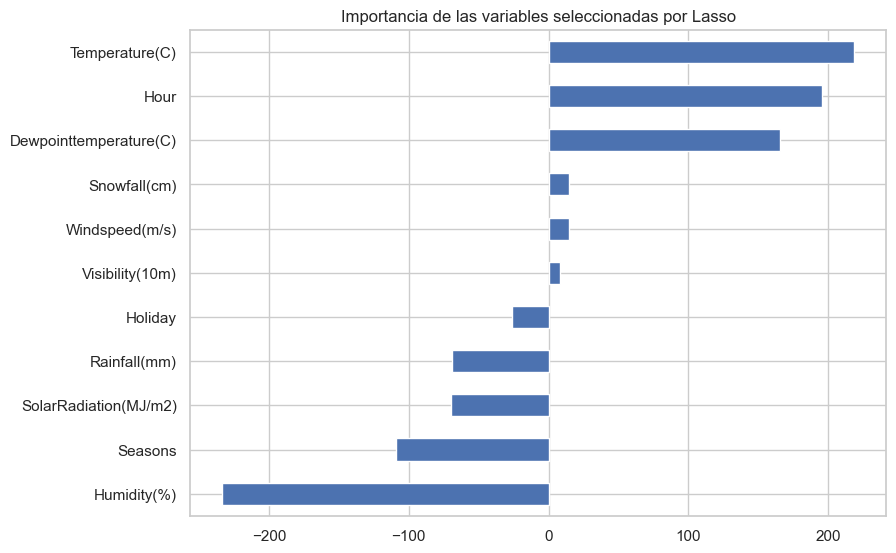

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Definir las variables dependiente e independientes
X = df[['Hour', 'Temperature(C)', 'Humidity(%)', 'Windspeed(m/s)', 'Visibility(10m)', 
          'Dewpointtemperature(C)', 'SolarRadiation(MJ/m2)', 'Rainfall(mm)', 'Snowfall(cm)', 
          'Seasons', 'Holiday']]
y = df['RentedBikeCount']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar LassoCV (Regresión Lasso con validación cruzada)
lasso = LassoCV(cv=5, random_state=42).fit(X_train_scaled, y_train)

# Mostrar los coeficientes de las variables
coef = pd.Series(lasso.coef_, index=X.columns)

# Mostrar las variables más importantes
print("Coeficientes estimados por Lasso:")
print(coef[coef != 0].sort_values(ascending=False))

# Predecir con el modelo entrenado
y_pred = lasso.predict(X_test_scaled)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Error cuadrático medio: {mse}')

# Graficar la importancia de las variables
plt.figure(figsize=(8, 6))
coef[coef != 0].sort_values().plot(kind="barh")
plt.title("Importancia de las variables seleccionadas por Lasso")
plt.show()


Coeficientes estimados por Lasso (con variables seleccionadas):
Temperature(C)             65.477124
Hour                      195.947801
Dewpointtemperature(C)    351.021837
Snowfall(cm)                3.986404
Humidity(%)              -287.020354
dtype: float64
Error cuadrático medio: 195877.36060319058


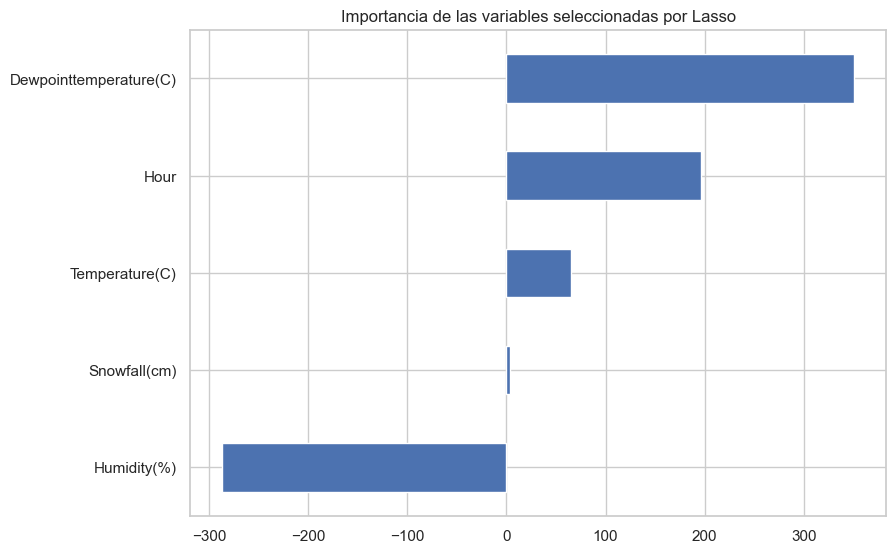

In [9]:
# Definir las variables dependientes e independientes importantes
X = df[['Temperature(C)', 'Hour', 'Dewpointtemperature(C)', 'Snowfall(cm)', 'Humidity(%)']]
y = df['RentedBikeCount']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar LassoCV (Regresión Lasso con validación cruzada)
lasso = LassoCV(cv=5, random_state=42).fit(X_train_scaled, y_train)

# Mostrar los coeficientes de las variables
coef = pd.Series(lasso.coef_, index=X.columns)

# Mostrar las variables más importantes
print("Coeficientes estimados por Lasso (con variables seleccionadas):")
print(coef)

# Predecir con el modelo entrenado
y_pred = lasso.predict(X_test_scaled)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Error cuadrático medio: {mse}')

# Graficar la importancia de las variables
plt.figure(figsize=(8, 6))
coef.sort_values().plot(kind="barh")
plt.title("Importancia de las variables seleccionadas por Lasso")
plt.show()

Error cuadrático medio: 169028.73463867517
R² (R cuadrado): 0.5694482773417677
Coeficientes estimados por Lasso:
Temperature(C)              0.000000
Hour                       70.507073
Dewpointtemperature(C)    346.605397
Snowfall(cm)               -8.736941
Humidity(%)              -214.250971
Temp_Humidity            -181.071963
Hour_Temp                 292.633339
dtype: float64


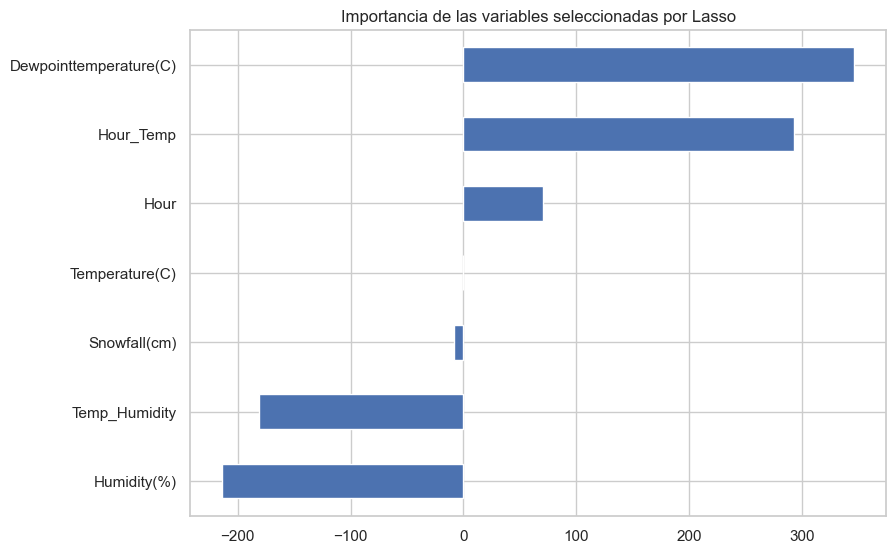

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Crear nuevas características (interacciones entre variables)
df['Temp_Humidity'] = df['Temperature(C)'] * df['Humidity(%)']
df['Hour_Temp'] = df['Hour'] * df['Temperature(C)']

# Definir las nuevas variables a incluir en el modelo
X = df[['Temperature(C)', 'Hour', 'Dewpointtemperature(C)', 'Snowfall(cm)', 'Humidity(%)', 'Temp_Humidity', 'Hour_Temp']]
y = df['RentedBikeCount']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar LassoCV (Regresión Lasso con validación cruzada)
lasso = LassoCV(cv=5, random_state=42).fit(X_train_scaled, y_train)

# Predecir con el modelo entrenado
y_pred = lasso.predict(X_test_scaled)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Error cuadrático medio: {mse}')

# Calcular el R² (R cuadrado) para medir la calidad del ajuste del modelo
r2 = r2_score(y_test, y_pred)
print(f'R² (R cuadrado): {r2}')

# Mostrar los coeficientes de las variables
coef = pd.Series(lasso.coef_, index=X.columns)
print("Coeficientes estimados por Lasso:")
print(coef)

# Graficar la importancia de las variables
plt.figure(figsize=(8, 6))
coef.sort_values().plot(kind="barh")
plt.title("Importancia de las variables seleccionadas por Lasso")
plt.show()
